In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import pandas as pd

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('drifts.csv')
df

,model,run,OHC (J yr-1),barystatic OHC (J yr-1),thermal OHC (J yr-1),hfds (J yr-1),netTOA (J yr-1),wfo (kg yr-1),masso (kg yr-1),soga (g/kg yr-1),masso (g/kg yr-1),zosbary (m yr-1),zostoga (m yr-1),masso (m yr-1)
0,ACCESS1-0,r1i1p1,1.880000e+21,1.470000e+20,1.730000e+21,2.290000e+21,7.820000e+21,-1.307750e+14,1.323700e+14,-3.790000e-06,-3.440000e-06,3.337500e-04,0.000178,3.539480e-04
1,ACCESS1-3,r1i1p1,-2.420000e+21,-6.240000e+20,-1.800000e+21,-1.270000e+21,1.650000e+21,-8.065390e+14,-5.630000e+14,1.540000e-05,1.460000e-05,-1.504552e-03,-0.000177,-1.505630e-03
2,BCC-CSM1-1,r1i1p1,9.500000e+19,1.900000e+19,7.610000e+19,1.810000e+21,-1.240000e+22,NaN,1.707840e+13,-5.860000e-05,-4.350000e-07,3.290000e-05,0.000016,3.250000e-05
3,CMCC-CESM,r1i1p1,-2.200000e+20,0.000000e+00,-2.200000e+20,2.210000e+21,2.460000e+22,-8.718780e+11,0.000000e+00,-2.680000e-06,0.000000e+00,-1.000000e-09,-0.000029,0.000000e+00
4,CMCC-CMS,r1i1p1,2.660000e+20,2.889130e+15,2.660000e+20,3.470000e+21,1.270000e+22,-9.149130e+11,2.607595e+09,-3.800000e-06,-6.770000e-11,5.430000e-10,0.000028,5.140000e-09
5,GFDL-ESM2G,r1i1p1,-2.000000e+20,-1.620000e+16,-2.000000e+20,-4.180000e+20,-1.780000e+21,-2.957520e+14,-1.330580e+12,1.680000e-06,3.350000e-08,NaN,NaN,NaN
6,MIROC-ESM,r1i1p1,8.920000e+21,-4.150000e+20,9.330000e+21,-6.600000e+23,-4.700000e+22,2.663070e+15,-3.743720e+14,9.560000e-06,9.520000e-06,-1.010853e-03,0.000896,-9.932230e-04
7,MIROC-ESM-CHEM,r1i1p1,1.020000e+22,-1.700000e+20,1.040000e+22,-6.580000e+23,-4.940000e+22,2.534180e+15,-1.539090e+14,3.960000e-06,3.920000e-06,-4.415650e-04,0.001022,-4.083260e-04
8,MPI-ESM-MR,r1i1p1,3.430000e+20,1.160000e+20,2.280000e+20,2.360000e+21,8.380000e+21,2.724420e+14,1.039840e+14,-2.620000e-06,-2.620000e-06,2.796690e-04,-0.000251,1.975720e-04
9,MPI-ESM-P,r1i1p1,2.750000e+20,1.160000e+20,1.590000e+20,7.240000e+20,8.550000e+21,5.679700e+14,1.042360e+14,-2.600000e-06,-2.600000e-06,2.781790e-04,-0.000258,1.974930e-04


In [4]:
sec_in_year = 365.25 * 24 * 60 * 60
for header in list(df.columns.values)[2:]:
    df[header] = df[header] / sec_in_year
    new_header = header.replace('yr-1', 's-1')
    if 'J s-1' in new_header:
        new_header = new_header.replace('J s-1', 'PW')
        df[header] = df[header] / 1e15
    df.rename(columns={header: new_header}, inplace=True)

In [5]:
df.insert(5, 'thermal OHC / OHC (%)', (df['thermal OHC (PW)'] / df['OHC (PW)'] ) * 100)

In [6]:
df

,model,run,OHC (PW),barystatic OHC (PW),thermal OHC (PW),thermal OHC / OHC (%),hfds (PW),netTOA (PW),wfo (kg s-1),masso (kg s-1),soga (g/kg s-1),masso (g/kg s-1),zosbary (m s-1),zostoga (m s-1),masso (m s-1)
0,ACCESS1-0,r1i1p1,0.059574,4.658149e-03,0.054820,92.021277,0.072566,0.247801,-4.144010e+06,4.194552e+06,-1.200979e-13,-1.090070e-13,1.057590e-11,5.636899e-12,1.121594e-11
1,ACCESS1-3,r1i1p1,-0.076685,-1.977337e-02,-0.057039,74.380165,-0.040244,0.052285,-2.555768e+07,-1.784039e+07,4.879966e-13,4.626461e-13,-4.767638e-11,-5.617411e-12,-4.771054e-11
2,BCC-CSM1-1,r1i1p1,0.003010,6.020737e-04,0.002411,80.105263,0.057355,-0.392932,NaN,5.411818e+05,-1.856922e-12,-1.378432e-14,1.042538e-12,5.038406e-13,1.029863e-12
3,CMCC-CESM,r1i1p1,-0.006971,0.000000e+00,-0.006971,100.000000,0.070031,0.779527,-2.762815e+04,0.000000e+00,-8.492408e-14,0.000000e+00,-3.168809e-17,-9.316298e-13,0.000000e+00
4,CMCC-CMS,r1i1p1,0.008429,9.155101e-08,0.008429,100.000000,0.109958,0.402439,-2.899184e+04,8.262969e+01,-1.204147e-13,-2.145284e-18,1.720663e-17,8.809288e-13,1.628768e-16
5,GFDL-ESM2G,r1i1p1,-0.006338,-5.133470e-07,-0.006338,100.000000,-0.013246,-0.056405,-9.371815e+06,-4.216354e+04,5.323599e-14,1.061551e-15,NaN,NaN,NaN
6,MIROC-ESM,r1i1p1,0.282658,-1.315056e-02,0.295650,104.596413,-20.914138,-1.489340,8.438760e+07,-1.186313e+07,3.029381e-13,3.016706e-13,-3.203200e-11,2.840663e-11,-3.147334e-11
7,MIROC-ESM-CHEM,r1i1p1,0.323218,-5.386975e-03,0.329556,101.960784,-20.850762,-1.565392,8.030332e+07,-4.877082e+06,1.254848e-13,1.242173e-13,-1.399235e-11,3.238954e-11,-1.293907e-11
8,MPI-ESM-MR,r1i1p1,0.010869,3.675818e-03,0.007225,66.472303,0.074784,0.265546,8.633166e+06,3.295054e+06,-8.302279e-14,-8.302279e-14,8.862176e-12,-7.965656e-12,6.260679e-12
9,MPI-ESM-P,r1i1p1,0.008714,3.675818e-03,0.005038,57.818182,0.022942,0.270933,1.799788e+07,3.303040e+06,-8.238903e-14,-8.238903e-14,8.814961e-12,-8.177206e-12,6.258176e-12


In [27]:
def plot_abline(ax, slope, intercept):
    """Plot a line from slope and intercept"""

    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, linestyle='--', c='0.5')
    

def plot_shading(ax):
    """Plot shading to indicate dominant source of drift."""
    
    x_vals = np.array(ax.get_xlim())
    y_vals = x_vals * 2
    ax.fill_between(x_vals, 0, y_vals, alpha=0.3, color='0.5')
    
    
def plot_eei_shading(ax):
    """Plot shading to indicate netTOA / OHC valid range."""
    
    x_vals = np.array(ax.get_xlim())
    y_vals = x_vals * 0.8
    ax.fill_between(x_vals, x_vals, y_vals, alpha=0.3, color='0.5')
    
    
def format_axis_label(orig_label):
    """Put LaTeX math into axis labels"""
    
    return orig_label.replace('(', '($').replace(')', '$)').replace('s-1', '\; s^{-1}')

In [34]:
zoom_limits = {'thermal energy conservation': [-0.15, 0.15],
               'mass conservation': [-2e7, 2e7],
               'salt conservation': [-7e-13, 7e-13],
               'barystatic consistency': [-1e-12, 1e-12],
               'planetary energy imbalance': [-0.15, 0.15]}

markers = ['o', '<', '^', '>', 'v', 's', 'p', 'D',
           'o', '<', '^', '>', 'v', 's', 'p', 'D']

def plot_aesthetics(ax, yvar, xvar, scinotation, shading):
    """Set the plot aesthetics"""
    
    if shading:
        plot_shading(ax)
    if xvar == 'netTOA (PW)':
        plot_eei_shading(ax)
    else:
        abline(ax, 1, 0)
    ax.axhline(y=0, color='black', linewidth=1.0)
    ax.axvline(x=0, color='black', linewidth=1.0)
    #ax.yaxis.major.formatter._useMathText = True
    #ax.xaxis.major.formatter._useMathText = True

    ylabel = format_axis_label(yvar)
    ax.set_ylabel(ylabel)
    xlabel = format_axis_label(xvar)
    ax.set_xlabel(xlabel)
    plt.sca(ax)
    if scinotation:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


def plot_comparison(df, title, xvar, yvar, scinotation=False, shading=False):
    """Plot comparison for given x and y variables."""
    
    fig = plt.figure(figsize=[14, 5])
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    colormap = cm.gist_rainbow
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['model']))]

    for dotnum, color in enumerate(colorlist):
        x = df[xvar][dotnum]
        y = df[yvar][dotnum]
        marker = markers[dotnum]
        label = df['model'][dotnum] + ' (' + df['run'][dotnum] + ')'
        ax1.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker, c=color, edgecolors='black')
        ax2.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker, c=color, edgecolors='black')
        ax2.legend()

    plot_aesthetics(ax1, yvar, xvar, scinotation, shading)
    plot_aesthetics(ax2, yvar, xvar, scinotation, shading)
        
    ax1.set_title('all models')
    ax2.set_title('zoomed in')
    plt.suptitle(title)

    # Put a legend to the right of the current axis
    if title == 'salt conservation':
        ax1.set_ylim([-5e-12, 5e-12])
        ax1.set_xlim([-5e-12, 5e-12])
    elif title == 'barystatic consistency':
        ax1.set_ylim([-1e-10, 1e-10])
        ax1.set_xlim([-1e-10, 1e-10])
    
    if not title == 'planetary energy imbalance':
        ax2.set_xlim(zoom_limits[title])
    ax2.set_ylim(zoom_limits[title])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

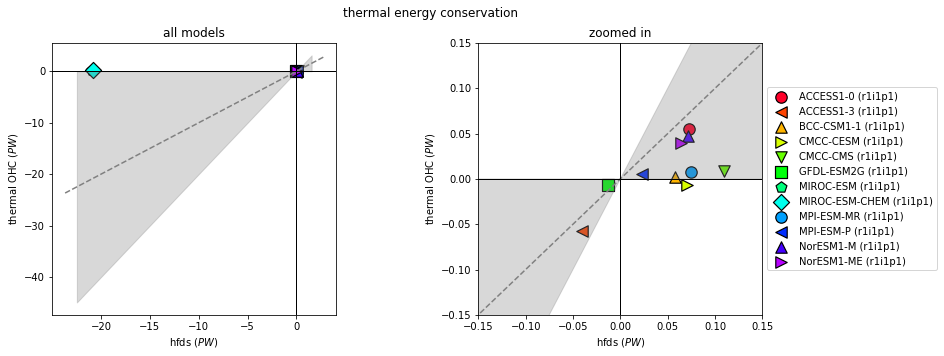

In [35]:
plot_comparison(df, 'thermal energy conservation', 'hfds (PW)', 'thermal OHC (PW)', shading=True)

Below the 1:1 line indicates that the ocean model is losing heat.

Within the shaded area means the drift in surface forcing is greater than the internally generated ocean model drift.

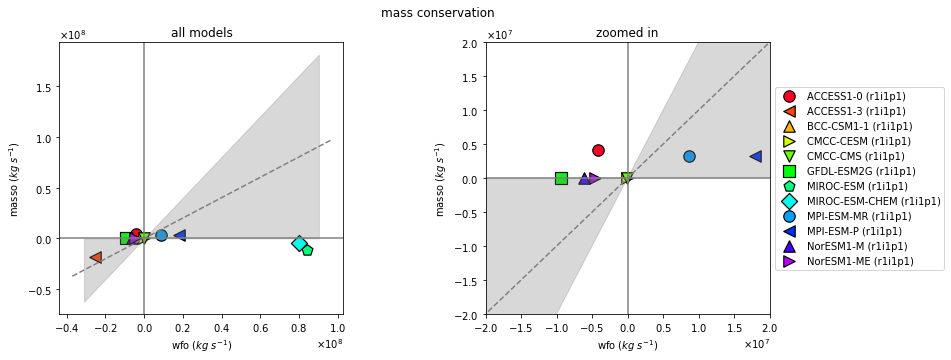

In [23]:
plot_comparison(df, 'mass conservation', 'wfo (kg s-1)', 'masso (kg s-1)', scinotation=True, shading=True)

Below the 1:1 line indicates that the ocean model is losing mass.

Within the shaded area means the drift in surface forcing is greater than the internally generated ocean model drift.

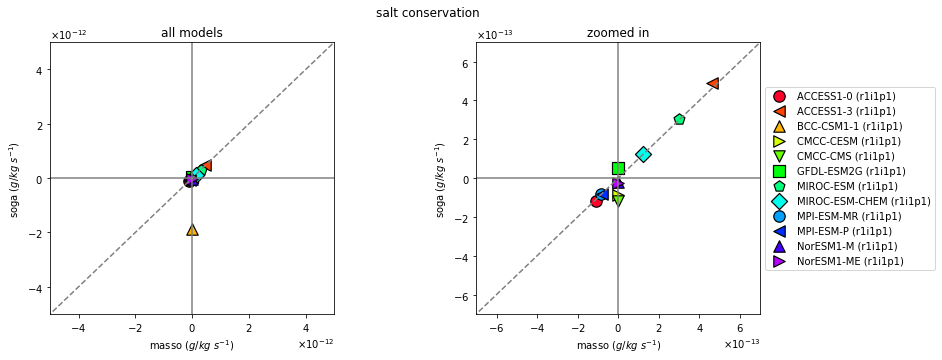

In [24]:
plot_comparison(df, 'salt conservation', 'masso (g/kg s-1)', 'soga (g/kg s-1)', scinotation=True)

Below the 1:1 line indicates that the ocean model is losing salt.

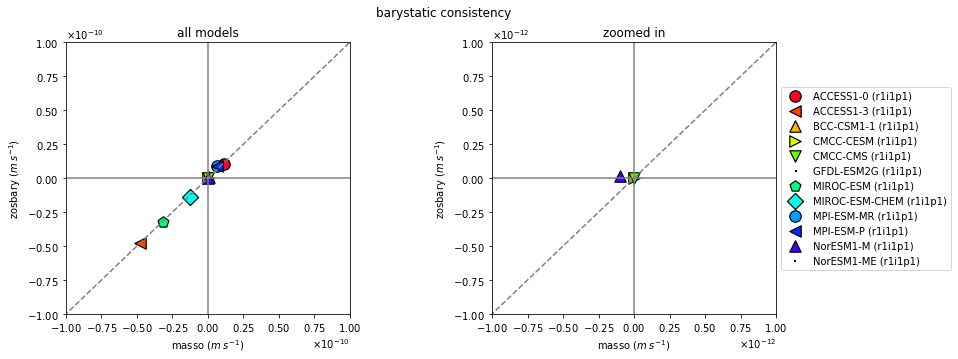

In [55]:
plot_comparison(df, 'barystatic consistency', 'masso (m s-1)', 'zosbary (m s-1)', scinotation=True)

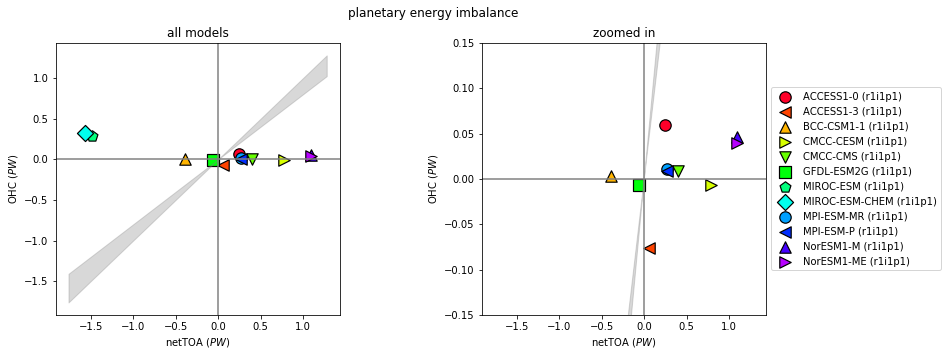

In [31]:
plot_comparison(df, 'planetary energy imbalance', 'netTOA (PW)', 'OHC (PW)')

Grey shading shows the region where $\delta H / \delta t$ = 80-100% of netTOA.

TODO (*italics maybe*, solid definitely)

- *Scatter: total surface flux vs OHC?*
- *Scatter: salt vs wfo?*
- *Scatter: steric components from CMIP5 models that don't report Boussinesq mass?*
- Bar: Compare magnitude of atmosphere leakage to ocean leakage